In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Temperament Analysis

In [140]:
# Reading processed dataframes
df_dogs = pd.read_csv("processed_dogs.csv", sep="\t")
df_cats = pd.read_csv("processed_cats.csv", sep="\t")

# Pandas options
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200

print('Intake condition: ')
print(df_cats['intake_condition'].unique())
print('\nIntake type: ')
print(df_cats['intake_type'].unique())
print('\nOutcome type: ')
print(df_cats['outcome_type'].unique())


Intake condition: 
['Normal' 'Sick' 'Injured' 'Aged' 'Feral' 'Nursing' 'Other' 'Pregnant']

Intake type: 
['Stray' 'Owner Surrender' 'Public Assist']

Outcome type: 
['Transfer' 'Adoption' 'Euthanasia' 'Missing' 'Died' 'Disposal'
 'Rto-Adopt' nan]


## 1. Which 10 characteristics are most popular for cats and dogs?

In [141]:
# Separate 
df_dogs_temperament = df_dogs.iloc[:, 12:]
df_cats_temperament = df_cats.iloc[:, 12:]

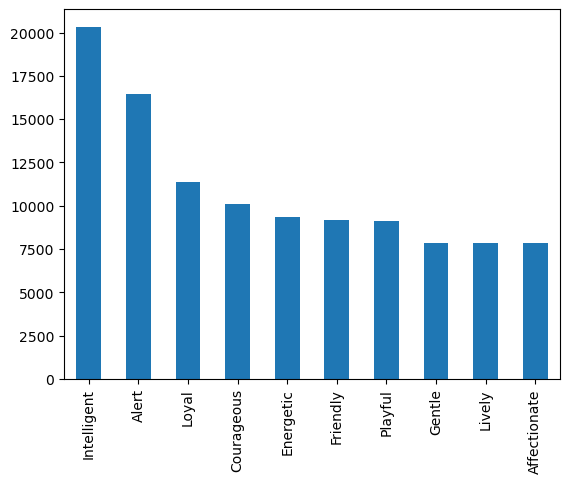

In [142]:
# Plot sum of dog temperament
df_dogs_temperament[df_dogs_temperament.sum().sort_values(ascending=False)[:].index]
df_dogs_sum = df_dogs_temperament.sum().sort_values(ascending=False)[:10]
df_dogs_sum.plot.bar()
plt.show()

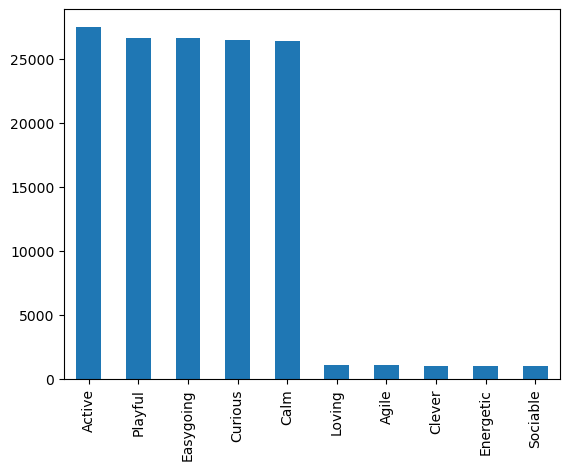

In [143]:
# Plot sum of cat temperament
df_cats_temperament[df_cats_temperament.sum().sort_values(ascending=False)[:].index]
df_cats_sum = df_cats_temperament.sum().sort_values(ascending=False)[0:10]
df_cats_sum.plot.bar()
plt.show()

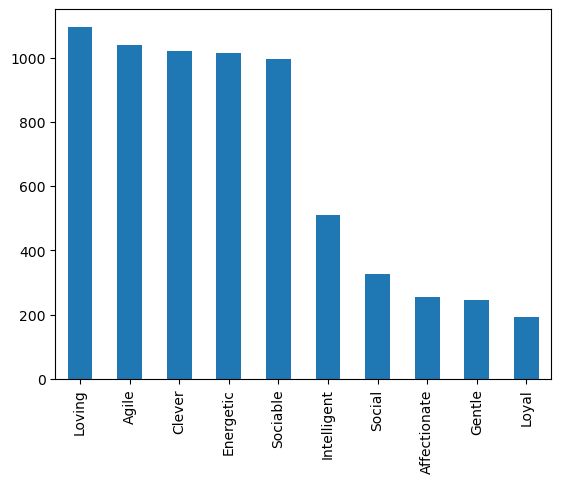

In [144]:
# Almost all cats had the first 5 traits, so we can remove them
df_cats_sum2 = df_cats_temperament.sum().sort_values(ascending=False)[5:15]
df_cats_sum2.plot.bar()
plt.show()

# 2. Which traits can we remove from cats and dogs?
For dogs all that are not in TOP 10.
For cats all that are not in TOP 5 or after #15. This is because almost all of the cats have the top 5 traits, so they make no diference. 

In [145]:
df_dogs = df_dogs[[
    'id',
    'animal_type',
    'breed',
    'size',
    'age_months',
    'color',
    'intake_condition',
    'intake_type',
    'sex',
    'outcome_type',
    'time_in_shelter_days',
    
    'Intelligent',
    'Alert',
    'Loyal',
    'Courageous',
    'Energetic',
    'Friendly',
    'Playful',
    'Gentle',
    'Lively',
    'Affectionate'    
]]

df_cats = df_cats[[
    'id',
    'animal_type',
    'breed',
    'size',
    'age_months',
    'color',
    'intake_condition',
    'intake_type',
    'sex',
    'outcome_type',
    'time_in_shelter_days',
    
    'Loving',
    'Agile',
    'Clever',
    'Energetic',
    'Sociable',
    'Intelligent',
    'Social',
    'Affectionate',
    'Gentle',
    'Loyal'    
]]

# Convert time in shelter days to int
df_dogs['time_in_shelter_days'] = df_dogs['time_in_shelter_days'].map(lambda i: int(i))
df_cats['time_in_shelter_days'] = df_cats['time_in_shelter_days'].map(lambda i: int(i))

In [146]:
df_dogs

,id,animal_type,breed,size,age_months,color,intake_condition,intake_type,sex,outcome_type,time_in_shelter_days,Intelligent,Alert,Loyal,Courageous,Energetic,Friendly,Playful,Gentle,Lively,Affectionate
0,A047759,Dog,Dachshund,Medium,120,Tricolor,Normal,Owner Surrender,Neutered Male,Transfer,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,A200922,Dog,Dachshund,Medium,192,Black/Tan,Normal,Owner Surrender,Neutered Male,Adoption,49,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,A208755,Dog,Border Collie,Large,178,Black/White,Sick,Owner Surrender,Neutered Male,Euthanasia,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,A210457,Dog,Chihuahua,Very Small,207,Tan/Black,Aged,Public Assist,Neutered Male,Adoption,9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,A218622,Dog,Pug,Medium,182,Gold/Gold,Sick,Owner Surrender,Neutered Male,Euthanasia,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,A769020,Dog,German Shepherd Dog,Very Large,2,Black/Tan,Normal,Stray,Intact Male,Adoption,3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28560,A769034,Dog,Labrador Retriever,Very Large,12,Black/White,Normal,Stray,Spayed Female,Adoption,5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
28561,A769036,Dog,Labrador Retriever,Very Large,12,Black/Tan,Normal,Stray,Spayed Female,Adoption,2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
28562,A769042,Dog,Pomeranian,Very Small,2,White,Normal,Stray,Intact Female,Transfer,4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [147]:
df_cats

,id,animal_type,breed,size,age_months,color,intake_condition,intake_type,sex,outcome_type,time_in_shelter_days,Loving,Agile,Clever,Energetic,Sociable,Intelligent,Social,Affectionate,Gentle,Loyal
0,A197810,Cat,American Shorthair,Very Small,179,Brown Tabby/White,Normal,Stray,Spayed Female,Transfer,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A260631,Cat,Domestic Long Hair,Very Small,174,Black/White,Normal,Stray,Neutered Male,Transfer,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A276644,Cat,Domestic Short Hair,Very Small,174,Tortie,Sick,Owner Surrender,Spayed Female,Transfer,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A282897,Cat,Domestic Short Hair,Very Small,165,Black Smoke/White,Normal,Owner Surrender,Neutered Male,Adoption,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A282897,Cat,Domestic Short Hair,Very Small,145,Black Smoke/White,Normal,Stray,Neutered Male,Adoption,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27998,A769056,Cat,Domestic Short Hair,Very Small,0,Black,Normal,Stray,Unknown,Transfer,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27999,A769057,Cat,Domestic Short Hair,Very Small,0,Gray Tabby,Normal,Stray,Unknown,Transfer,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28000,A769058,Cat,Domestic Short Hair,Very Small,0,Blue,Normal,Stray,Unknown,Transfer,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28001,A769059,Cat,Domestic Short Hair,Very Small,0,Blue,Normal,Stray,Unknown,Transfer,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. With which traits do adopted animals stay in the shelter the least?

In [152]:
df_adopted_dogs = df_dogs[df_dogs["outcome_type"].str.contains("Adoption")==True]
df_adopted_dogs = df_adopted_dogs.sort_values('time_in_shelter_days')

df_adopted_cats = df_cats[df_cats["outcome_type"].str.contains("Adoption")==True]
df_adopted_cats = df_adopted_cats.sort_values('time_in_shelter_days')



In [151]:
df_adopted_dogs['time_in_shelter_days'].describe()
# Dogs who stay less than 7 days are considered to have stayed for a short while

count    18328.000000
mean        24.659155
std         54.324816
min          0.000000
25%          4.000000
50%          7.000000
75%         22.000000
max       1268.000000
Name: time_in_shelter_days, dtype: float64

In [154]:
df_adopted_cats['time_in_shelter_days'].describe()
# Cats who stay less than 20 days are considered to have stayed for a short while

count    12658.000000
mean        36.931822
std         48.890482
min          0.000000
25%          7.000000
50%         24.000000
75%         50.000000
max       1101.000000
Name: time_in_shelter_days, dtype: float64

In [159]:
df_adopted_dogs_short_stay = df_adopted_dogs[df_adopted_dogs['time_in_shelter_days'] < 7]
df_adopted_cats_short_stay = df_adopted_cats[df_adopted_cats['time_in_shelter_days'] < 20]

df_adopted_cats_short_stay

,id,animal_type,breed,size,age_months,color,intake_condition,intake_type,sex,outcome_type,time_in_shelter_days,Loving,Agile,Clever,Energetic,Sociable,Intelligent,Social,Affectionate,Gentle,Loyal
23799,A751057,Cat,Domestic Short Hair,Very Small,2,Blue Tabby,Normal,Owner Surrender,Spayed Female,Adoption,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19597,A734263,Cat,Domestic Short Hair,Very Small,3,Black/White,Normal,Owner Surrender,Spayed Female,Adoption,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8455,A696257,Cat,Domestic Short Hair,Very Small,10,Black/White,Normal,Owner Surrender,Spayed Female,Adoption,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417,A661949,Cat,Domestic Short Hair,Very Small,8,Brown Tabby,Normal,Owner Surrender,Neutered Male,Adoption,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,A665590,Cat,Domestic Short Hair,Very Small,25,Brown Tabby,Normal,Stray,Neutered Male,Adoption,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,A716339,Cat,Domestic Short Hair,Very Small,2,Orange Tabby,Normal,Stray,Intact Male,Adoption,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22798,A748100,Cat,Domestic Short Hair,Very Small,2,White/Black,Normal,Stray,Intact Male,Adoption,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2488,A675780,Cat,Domestic Short Hair,Very Small,2,Blue Tabby/White,Normal,Stray,Intact Male,Adoption,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17833,A729036,Cat,Domestic Short Hair,Very Small,2,Cream Tabby,Normal,Stray,Intact Female,Adoption,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
